# 参数曲线的绘制

Facebook 名字改成了 Meta，也更换了 Logo。

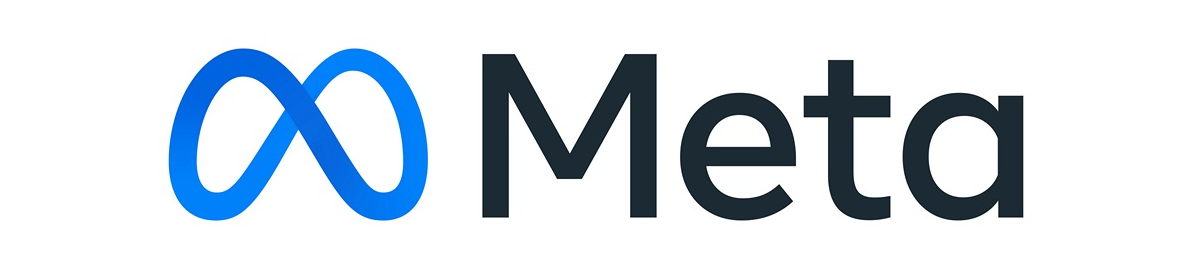

这个 Logo 并不是随意设计的，而是来自数学上的 Lissajous 曲线。

平面上的 Lissajous 曲线可以看成是沿着相互垂直方向的两个正弦振动的合成，具体是由以下参数方程描述的一系列曲线：

$$
\left\{\begin{array}{l}
x(t)=A \sin (a t+\delta) \\[1em]
y(t)=B \sin (b t)
\end{array}\right.
$$

Lissajous 曲线在物理学、天文学和其他科学中都有应用。下面是一些 Lissajous 曲线示例，你可以通过更改 Python 代码中常量 A 和 B 的值，塑造出更多的具体曲线。

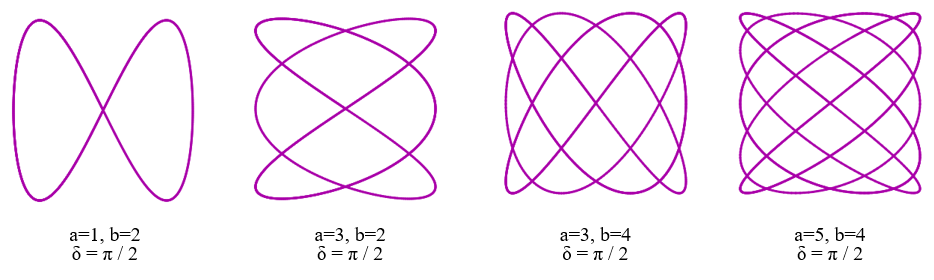

## 如何绘制这些曲线？

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
sns.set_style("white")

我们不妨先来考虑一下简单的情况，那就是圆。那么一个问题就是如何生成圆上采样点序列的坐标呢？

$$
\left\{\begin{array}{l}
x = ? \\[1em]
y = f(x)?
\end{array}\right.
$$

- 分段处理

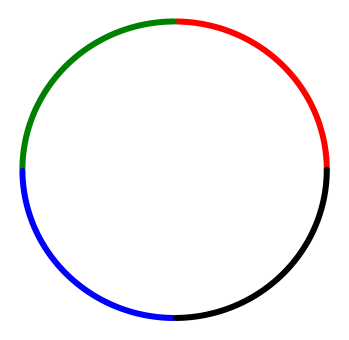

In [8]:
def circle_xy():

    cols = ['r','g','b','k']
    plt.figure(figsize=(6, 6))
    theta = np.linspace(0, 2*np.pi, 400)
    for i in range(4):
        t = theta[i*100:(i+1)*100]
        x = np.cos(t)
        y = np.sin(t)
        plt.plot(x, y, c=cols[i],lw=6)

    plt.axis('off')

circle_xy()

- 参数化曲线

$$
\left\{\begin{array}{l}
x = cos(\theta) \\[1em]
y = sin(\theta)
\end{array}\right.
$$

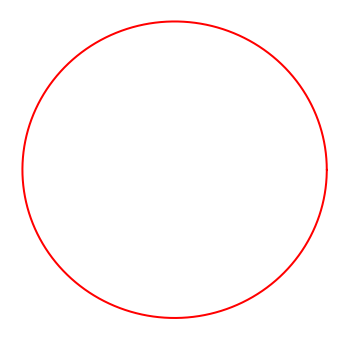

In [9]:
def circle(a, fill=False):
    theta = np.linspace(0, 2*np.pi, 500)
    
    x = a*np.cos(theta)
    y = a*np.sin(theta)
    
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, c='r')
    if fill:
        plt.fill(x, y,'r', alpha=0.5)
    plt.axis('off')

circle(1)

## 绘制 Meta Logo

所谓参数曲线，就是要根据参数来确定曲线上的每一个点。也就是说在绘制时，我们需要根据参数来取不同点的 $x$ 和 $y$ 坐标。

- 设置常量参数 $A$、$B$、$a$、$b$ 以及 $\delta$，控制曲线整体的形状。

In [258]:
A, B = 1, 1
delta = 3.14159/2

- 设置曲线上采样点的参数向量 $t$。我们先取 50 个点，便于观察点在曲线上的分布。

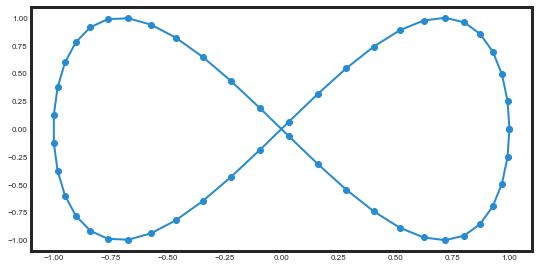

In [259]:
t = np.linspace(0, 2*np.pi, 50)

fig = plt.figure(figsize=(8,4.5))
a = 1 
b = 2
x = A * np.sin(a*t + delta) 
y = B * np.sin(b*t) 
plt.plot(x, y, '-o');

这画出来了一个无穷大 $\large \infty$。大家不妨对照上图中的点，再根据参数 t 的取值，计算一下是从哪一点开始一点一点绘制的。

我们不妨将上述内容写在一起，定义一个简单的函数，方便后面调用。

In [260]:
def drawLissajous2D(r=10,n=500,A=1,B=1,a=1,b=1,delta=1.75,lw=2):
    
    t = np.linspace(0, r, n)
    
    fig = plt.figure(figsize=(8,4.5))
    x = A * np.sin(a*t + delta) 
    y = B * np.sin(b*t) 
    plt.plot(x, y, '-',linewidth=lw)

为了揭示曲线上绘制的点列，我们将参数 $t$ 的范围缩小。

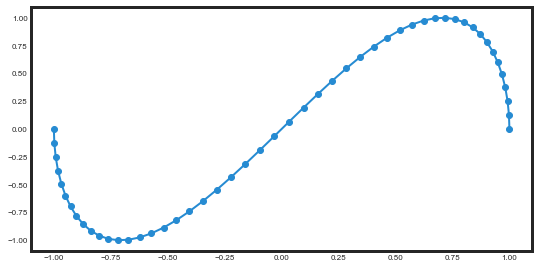

In [261]:
t = np.linspace(0, np.pi, 50)

fig = plt.figure(figsize=(8,4.5))
a = 1 
b = 2
x = A * np.sin(a*t + delta) 
y = B * np.sin(b*t) 
plt.plot(x, y, '-o');

上面只看到了无穷大的一半，因为只画了半个周期。把这些点想象成动点，将其两个坐标分开考虑，$x$ 坐标在水平方向来回变动，而 $y$ 坐标在竖直方向来回变动。可以将 Lissajous 曲线看成是沿着互相垂直方向的两个正弦振动的合成。

- 取 500 个点，调整下 $a$ 和 $b$ 的值，再次绘制曲线。曲线的样子是不是改变了，上下并不对称了。

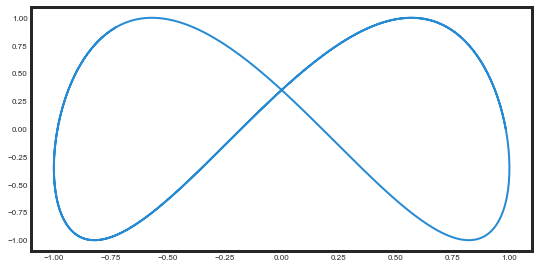

In [262]:
drawLissajous2D(n=500,a=1,b=2)

- 调整常量参数以及线条的宽度

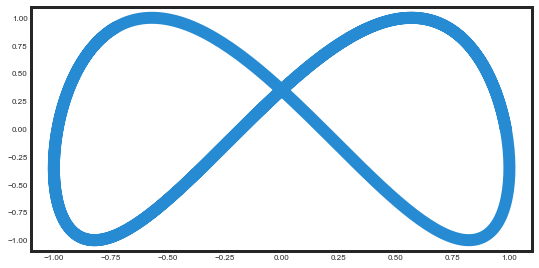

In [263]:
drawLissajous2D(n=500,a=1,b=2,lw=12)

- 看看其他参数画出来的是个啥？

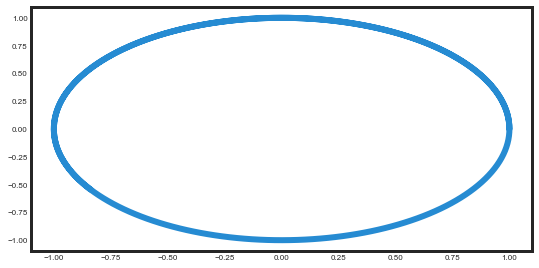

In [264]:
drawLissajous2D(n=300,a=1,b=1,delta=3.14159/2,lw=6)

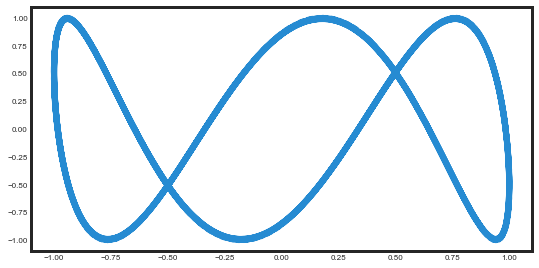

In [265]:
drawLissajous2D(n=300,a=3,b=9,lw=6)

## 3D 版本

还可以二维版本的 Lissajous 曲线扩展到三维空间中，得到三维版本的空间 Lissajous 曲线。只要增加一个 $z$ 坐标，具体形式可以是下面这样子，

$$
\left\{\begin{array}{l}
x(t) = A \sin (a t) \\[1em]
y(t) = B \sin (b t + \delta) \\[1em]
z(t) = C \sin (c t + \epsilon)
\end{array}\right.
$$

In [6]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8)

In [7]:
def drawLissajous3D(r=2*np.pi,n=500,A=1,B=1,C=1,a=1,b=1,c=2,delta=1.75,epsilon=1.75):

    # 设置 Lissajous 参数。
    t = np.linspace(0, r, n)

    x = A * np.sin(a*t) 
    y = B * np.sin(b*t + delta) 
    z = C * np.sin(c*t + epsilon) 

    plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')

    ax.plot3D(x, y, z, '-', linewidth=6)
    ax.set_xlabel('$x = A sin(at)$', fontsize=12)
    ax.set_ylabel('$y = B sin(bt + \delta)$', fontsize=12)
    ax.set_zlabel('$z = C sin(ct + \epsilon)$', fontsize=12)
    plt.title("Lissajous 3D Curve", fontsize=12)
    ax.view_init(2, 60)

<IPython.core.display.Javascript object>


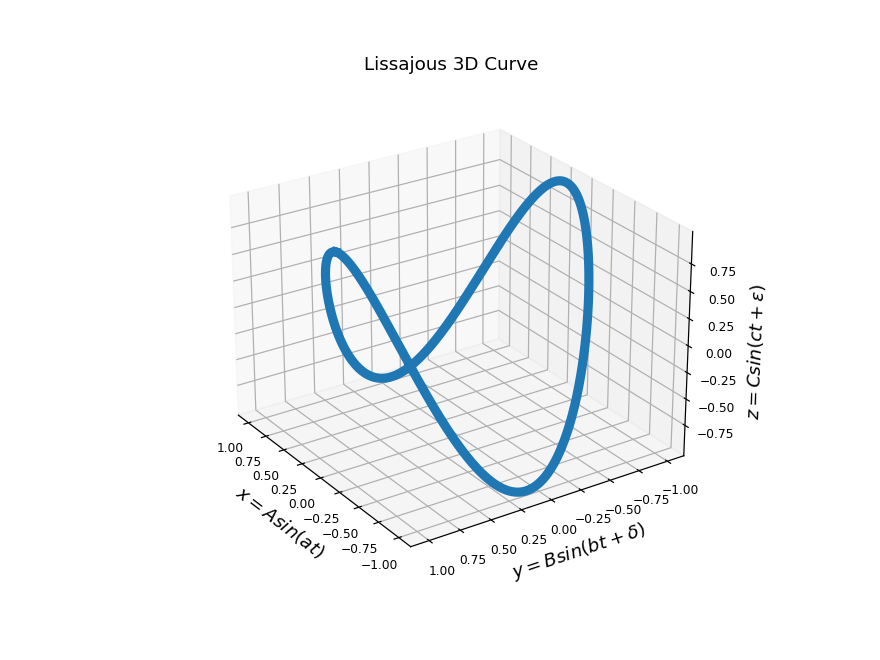

In [8]:
drawLissajous3D()

## 心形曲线

直角坐标系参数方程

$$
\left\{\begin{array}{l}
x(\theta)=a(1-\cos \theta) \sin \theta \\
y(\theta)=a(1-\cos \theta) \cos \theta
\end{array}\right.
$$

极坐标系参数方程

$$
r=a(1-\sin \theta)
$$

In [207]:
import numpy as np
import matplotlib.pyplot as plt

- 直角坐标系

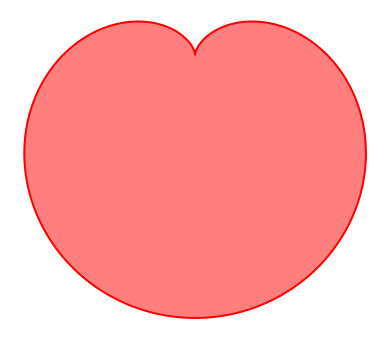

In [227]:
import matplotlib.pyplot as plt
import numpy as np


def cardioid_xy(a):
    theta = np.linspace(0, 2*np.pi, 500)
    
    x = a*(1-np.cos(theta))*np.sin(theta)
    y = a*(1-np.cos(theta))*np.cos(theta)
    
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, c='r')
    plt.fill(x, y,'r', alpha=0.5)
    plt.axis('off')

cardioid_xy(1)

- 极坐标形式

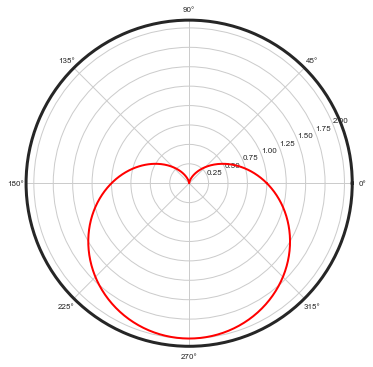

In [206]:
def cardioid_polar(a):

    theta = np.linspace(0, 2*np.pi, 500)
    r = a*(1 - np.sin(theta))
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    ax.plot(theta, r, color='red')

    plt.show()

cardioid_polar(1)

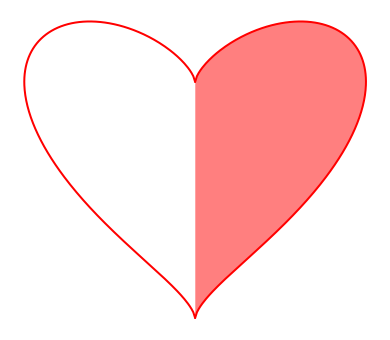

In [253]:
def cardioid_():
    
    t = np.linspace(0, np.pi, 300)
    x = np.sin(t) 
    y = np.cos(t) + np.power(x, 2/3)
    
    plt.figure(figsize=(6, 6))
    plt.plot( x, y, c='r')
    plt.plot(-x, y, c='r')
    plt.fill( x, y, 'r', alpha=0.5)
    plt.axis('off')
    

cardioid_()